<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido
#### Christian Yanez

# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [11]:
import numpy as np
a = np.array([[1,2,3],[2,3,1]])
b = np.array([-1,4,3])
c = a @ b
c

array([16, 13])

<div class="alert alert-block alert-info">
<b>1) Matriz de M por M de corelación de los taps de entrada</b>
</div>

Ec 1.1 

$\phi(t,k) = \sum_{i=M}^{N} u(i-k)u^*(i-t)$

$Matriz:$

Ec 1.2

$\phi=\begin{bmatrix}
\phi(0,0) &  ...& \phi(M,0)\\ 
 .& . & .\\
 \phi(0,M) & ...  &\phi(M,M)
\end{bmatrix}$

Ec 1.3

$\phi=A^H A$

Ec 1.4

$AH=\begin{bmatrix}
u(M)&  ...& u(N)\\ 
 .& . & .\\
 u(1) & ...  &u(N-M+1)
\end{bmatrix}$

In [38]:
#*************Cálculo de AH**********************
import numpy as np
import matplotlib.pyplot as plt

N=100
M=4


ui=np.arange(1,N+1,1)#representación de la señal de entrada u(i)

AH = np.zeros((M,N-M))
#AH = np.zeros((M,N-M+1))

for i in range(M):
    AH[i,:]=ui[M-i:N-i]
    #AH[i,:]=ui[M-i-1:N-i]
#*************Cálculo de A***********************  
A=AH.transpose()

#*************Cálculo de la matriz de corelación phi según Ec 1.3**********************
phi=AH@A

phi

array([[338320., 333280., 328240., 323200.],
       [333280., 328336., 323392., 318448.],
       [328240., 323392., 318544., 313696.],
       [323200., 318448., 313696., 308944.]])

<div class="alert alert-block alert-info">
<b>2) Vector de correlación cruzada</b>
</div>

Ec 1.5

$z(-k) = \sum_{i=M}^{N} u(i-k)d^*(i)$

$Vector:$

Ec 1.6

$z=[z(0),z(-1),....z(-M+1)]^T$

Ec 1.7

$z=A^Hd$

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#*************Cálculo de dH**********************
dH=np.arange(M,N,1)#representación de la señal deseada d(i)
#dH=np.arange(M,N+1,1)
#*************Cálculo del vector de correlación cruzada z según Ec 1.7 **********************
z=AH@dH.transpose()
z

array([333280., 328336., 323392., 318448.])

<div class="alert alert-block alert-info">
<b>3) El valor mínimo de $ef$</b>
</div>

Ec 1.8

$d^Hd-d^HA(A^HA)^-1A^Hd$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
#*************Cálculo del error mínimo ef según Ec 1.8**********************
d=dH.transpose()
Ef=dH@d-dH@A@inv(AH@A)@AH@d
Ef

-2648898928.0

<div class="alert alert-block alert-info">
<b>4) El vector de taps ${\hat{w}}$</b>
</div>


Ec 1.9

$\hat{w}=(A^HA)^-1A^Hd$

In [41]:
#*************Cálculo del vector de taps según Ec 1.9**********************
w_hat=inv(AH@A)@AH@d
w_hat

array([ 11566.28407669,  -1844.        , -11100.75      ,   5533.5       ])

<div class="alert alert-block alert-info">
<b>5) Cálculo del filtro para $$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$ </b>
</div>

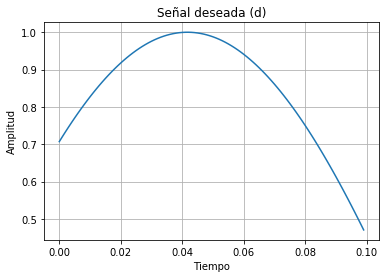

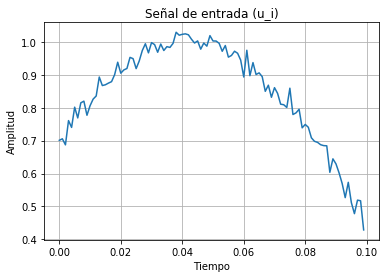

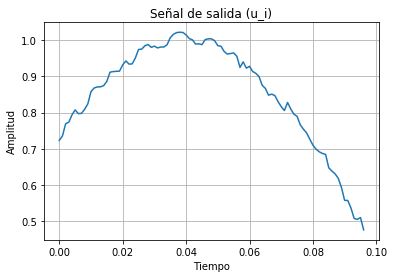

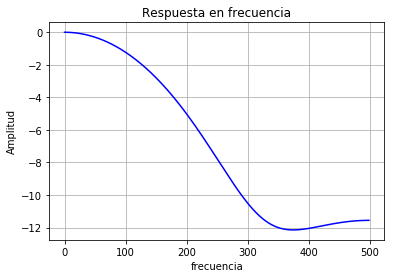

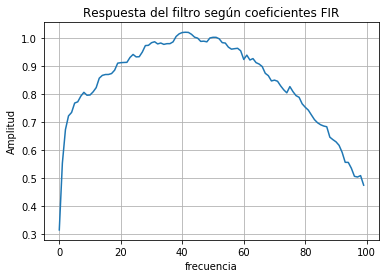

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from   scipy import signal
from scipy import signal as sp

M=4
N=100
f0      = 3
fs      = 1000
ts      = 1/fs
coef_ruido=0.02

#*********************Señal deseada***************
t=np.linspace(0,(N-1)*ts,N)
d_i=np.sin(2*np.pi*f0*t + np.pi/4)
#*********************Señal de entrada************
u_i=d_i + np.random.normal(0,coef_ruido,np.size(d_i))
#**********************AH*************************
AH = np.zeros((M,N-M+1))
for i in range(M):
    AH[i,:]=u_i[M-i-1:N-i]

A=AH.transpose()
#*******************dH****************************
dH=d_i[M-1:N]

d=dH.transpose()
#*****************Correlación cruzada************
z=AH@d
#*****************Error mínimo*******************
Ef=dH@d-dH@A@inv(AH@A)@AH@d
#*****************Vector de taps*****************
w_hat=inv(AH@A)@AH@d

#*****************Filtrado***********************
f_i=A@w_hat
#*********Filtrado según coeficientes FIR********
salida=sp.lfilter(w_hat,1,u_i)
#*****************Respuesta en frecuencia********
(w , h) = signal.freqz(w_hat,1)



plt.figure(1)
plt.plot(t,d_i)
plt.title('Señal deseada (d)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(2)
plt.plot(t,u_i)
plt.title('Señal de entrada (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(3)
plt.plot(t[0:N-M+1],f_i)
plt.title('Señal de salida (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(4)
plt.plot((fs * w / (2 * np.pi)), 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(5)
plt.plot(salida)
plt.title('Respuesta del filtro según coeficientes FIR')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')
plt.grid()

plt.show()



<div class="alert alert-block alert-info">
<b>6) Comportamiento del filtro </b>
</div>

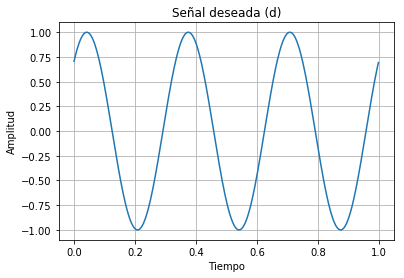

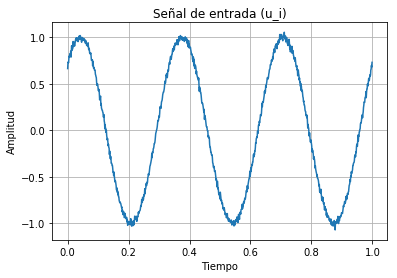

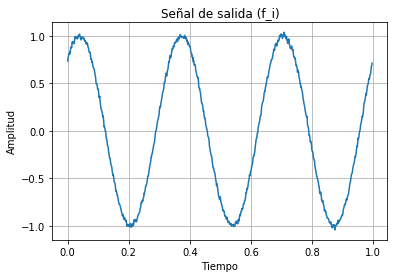

In [43]:

#  6.1 Aumento de N (número de muestras de la señal de entrada)

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

M=4
N=1000
samples=1000
f0      = 3 
fs      = 1000
ts      = 1/fs
coef_ruido=0.02
v_error=[0,0,0,0]

#*********************Señal deseada***************
t=np.linspace(0,(samples-1)*ts,samples)
d_i=np.sin(2*np.pi*f0*t + np.pi/4)
#*********************Señal de entrada************
u_i=d_i + np.random.normal(0,coef_ruido,samples)
#**********************AH*************************
AH = np.zeros((M,N-M+1))
for i in range(M):
    AH[i,:]=u_i[M-i-1:N-i]

A=AH.transpose()
#*******************dH****************************
dH=d_i[M-1:N]

d=dH.transpose()
#*****************Correlación cruzada************
z=AH@d
#*****************Error mínimo*******************
Ef=dH@d-dH@A@inv(AH@A)@AH@d
v_error[0]=Ef
#*****************Vector de taps*****************
w_hat=inv(AH@A)@AH@d

#*****************Filtrado***********************
f_i=A@w_hat



plt.figure(1)
plt.plot(t,d_i)
plt.title('Señal deseada (d)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(2)
plt.plot(t,u_i)
plt.title('Señal de entrada (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(3)
plt.plot(t[0:N-M+1],f_i)
plt.title('Señal de salida (f_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()


plt.show()


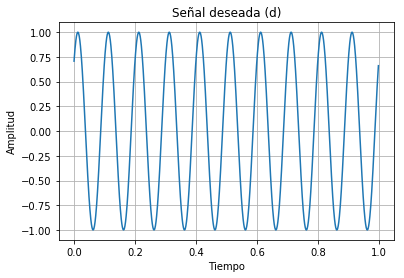

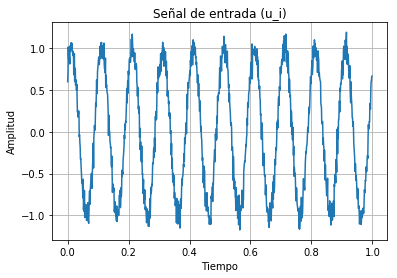

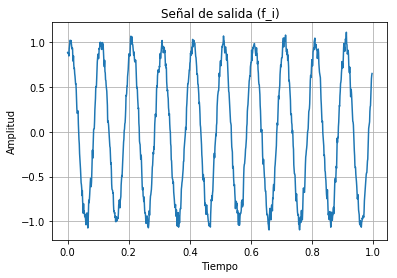

In [44]:
#  6.2 Aumento de f0 (frecuencia fundamental) y nivel de ruido

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

M=4
N=1000
f0      = 10 
fs      = 1000
ts      = 1/fs
coef_ruido=0.09

#*********************Señal deseada***************
t=np.linspace(0,(samples-1)*ts,samples)
d_i=np.sin(2*np.pi*f0*t + np.pi/4)
#*********************Señal de entrada************
u_i=d_i + np.random.normal(0,coef_ruido,samples)
#**********************AH*************************
AH = np.zeros((M,N-M+1))
for i in range(M):
    AH[i,:]=u_i[M-i-1:N-i]

A=AH.transpose()
#*******************dH****************************
dH=d_i[M-1:N]

d=dH.transpose()
#*****************Correlación cruzada************
z=AH@d
#*****************Error mínimo*******************
Ef=dH@d-dH@A@inv(AH@A)@AH@d
v_error[1]=Ef
#*****************Vector de taps*****************
w_hat=inv(AH@A)@AH@d

#*****************Filtrado***********************
f_i=A@w_hat

plt.figure(1)
plt.plot(t,d_i)
plt.title('Señal deseada (d)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(2)
plt.plot(t,u_i)
plt.title('Señal de entrada (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(3)
plt.plot(t[0:N-M+1],f_i)
plt.title('Señal de salida (f_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.show()

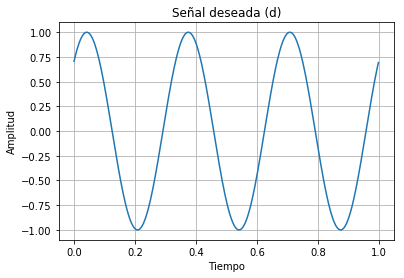

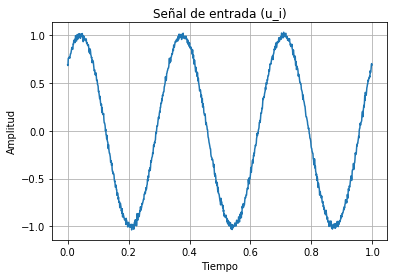

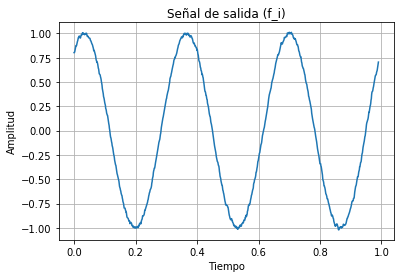

In [45]:
#  6.3 Aumento de M (número de entradas al filtro)

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

M=10
N=1000
f0      = 3 
fs      = 1000
ts      = 1/fs
coef_ruido=0.02

#*********************Señal deseada***************
t=np.linspace(0,(samples-1)*ts,samples)
d_i=np.sin(2*np.pi*f0*t + np.pi/4)
#*********************Señal de entrada************
u_i=d_i + np.random.normal(0,coef_ruido,samples)
#**********************AH*************************
AH = np.zeros((M,N-M+1))
for i in range(M):
    AH[i,:]=u_i[M-i-1:N-i]

A=AH.transpose()
#*******************dH****************************
dH=d_i[M-1:N]

d=dH.transpose()
#*****************Correlación cruzada************
z=AH@d
#*****************Error mínimo*******************
Ef=dH@d-dH@A@inv(AH@A)@AH@d
v_error[2]=Ef
#*****************Vector de taps*****************
w_hat=inv(AH@A)@AH@d

#*****************Filtrado***********************
f_i=A@w_hat

plt.figure(1)
plt.plot(t,d_i)
plt.title('Señal deseada (d)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(2)
plt.plot(t,u_i)
plt.title('Señal de entrada (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(3)
plt.plot(t[0:N-M+1],f_i)
plt.title('Señal de salida (f_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.show()


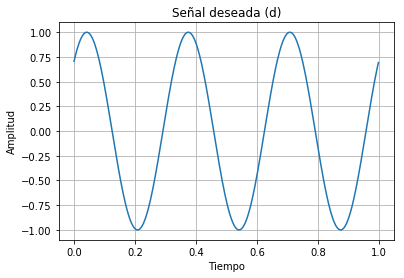

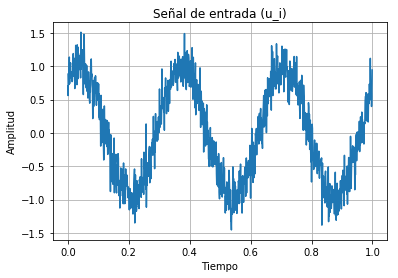

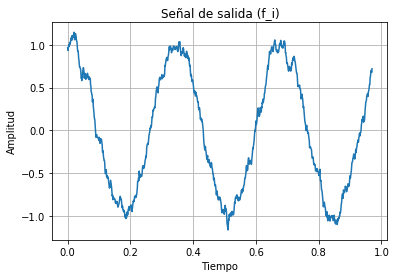

In [46]:
#  6.4 Aumento de M (número de entradas al filtro) y nivel de ruido

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

M=30
N=1000
f0      = 3 
fs      = 1000
ts      = 1/fs
coef_ruido=0.2

#*********************Señal deseada***************
t=np.linspace(0,(samples-1)*ts,samples)
d_i=np.sin(2*np.pi*f0*t + np.pi/4)
#*********************Señal de entrada************
u_i=d_i + np.random.normal(0,coef_ruido,samples)
#**********************AH*************************
AH = np.zeros((M,N-M+1))
for i in range(M):
    AH[i,:]=u_i[M-i-1:N-i]

A=AH.transpose()
#*******************dH****************************
dH=d_i[M-1:N]

d=dH.transpose()
#*****************Correlación cruzada************
z=AH@d
#*****************Error mínimo*******************
Ef=dH@d-dH@A@inv(AH@A)@AH@d
v_error[3]=Ef
#*****************Vector de taps*****************
w_hat=inv(AH@A)@AH@d

#*****************Filtrado***********************
f_i=A@w_hat

plt.figure(1)
plt.plot(t,d_i)
plt.title('Señal deseada (d)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(2)
plt.plot(t,u_i)
plt.title('Señal de entrada (u_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.figure(3)
plt.plot(t[0:N-M+1],f_i)
plt.title('Señal de salida (f_i)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

plt.show()


<div class="alert alert-block alert-info">
<b></b> Comparación de errores
</div>

In [47]:

from pandas import DataFrame
from IPython.display import HTML

resultados = [ ['Ef','Descripción'], 
                   [v_error[0],'Aumento de N (señal de entrada)'],
                   [v_error[1],'Aumento de f0 y nivel de ruido       '],
                   [v_error[2],'Aumento de M (número de entradas al filtro)'],
                   [v_error[3],'Aumento de M y nivel de ruido']
                 ]

df = DataFrame(resultados, columns=['Error mínimo',''],
               index=['ID', 
                      6.1, 
                      6.2, 
                      6.3, 
                      6.4
                     ])

HTML(df.to_html())

,Error mínimo,
ID,Ef,Descripción
6.1,0.245629,Aumento de N (señal de entrada)
6.2,3.641,Aumento de f0 y nivel de ruido
6.3,0.124123,Aumento de M (número de entradas al filtro)
6.4,5.39504,Aumento de M y nivel de ruido


<div class="alert alert-success alert-info">
<b>Conclusión</b>
    
    La mejor respuesta del filtro se obtiene al aumentar M, el número de taps del filtro.
    
    Al trabajar con números reales, los cálculos se simplifican mucho.
    
    Al aumentar el número de muestras de la señal de entrada, se mejora la resoulución de la señal en 
    general pero la respuesta del filtro no mejora significativamente.
    
    El cálculo del error mínimo genera la mejor respuesta en comparación con otro tipo de filtros. 
    
    La respuesta en frecuencia del filtro corresponde a un filtro pasa bajos.
    
    La mejor respuesta de error mínimo se obtiene en la prueba 6.4 (aumento de M -entradas al filtro).
    
    Si se utilizan los coeficientes de wienner directamente como coeficientes de un filtro FIR
    mediante la función scipy.lfilter, el resultado es equivalente.
    
    
</div>